In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

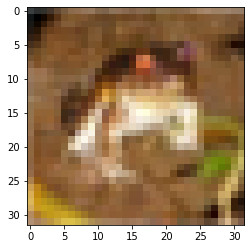

In [5]:
plt.imshow(X_train[0])

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog', 'horse','ship','truck']

In [7]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
    

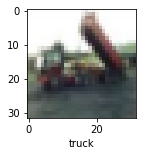

In [8]:
plot_sample(X_train, y_train, 2)

In [9]:
#Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train,epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 138s 3ms/sample - loss: 1.8554 - accuracy: 0.3373
Epoch 2/5
50000/50000 [==============================] - 115s 2ms/sample - loss: 1.6558 - accuracy: 0.4124
Epoch 3/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.5696 - accuracy: 0.4444
Epoch 4/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.5075 - accuracy: 0.4671
Epoch 5/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.4564 - accuracy: 0.4861


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for  element in y_pred]

print("Classification Report :\n", classification_report(y_test, y_pred_classes))

Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.48      0.54      1000
           1       0.66      0.55      0.60      1000
           2       0.27      0.63      0.38      1000
           3       0.35      0.36      0.36      1000
           4       0.68      0.09      0.16      1000
           5       0.41      0.39      0.40      1000
           6       0.60      0.36      0.45      1000
           7       0.48      0.63      0.55      1000
           8       0.59      0.64      0.61      1000
           9       0.57      0.56      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.52      0.47      0.46     10000
weighted avg       0.52      0.47      0.46     10000



In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [13]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
cnn.fit(X_train,y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 58s 1ms/sample - loss: 1.4366 - accuracy: 0.4844
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.0808 - accuracy: 0.6242
Epoch 3/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.9445 - accuracy: 0.6718
Epoch 4/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.8564 - accuracy: 0.7034
Epoch 5/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.7952 - accuracy: 0.7233
Epoch 6/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.7310 - accuracy: 0.7473
Epoch 7/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 0.6792 - accuracy: 0.7638
Epoch 8/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.6328 - accuracy: 0.7798
Epoch 9/10
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.5856 - accuracy: 0.7988
Epoch 10/10
50

In [15]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 360us/sample - loss: 0.9633 - accuracy: 0.7004


[0.9632924214363098, 0.7004]